In [45]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving IndianNewsPaper.csv to IndianNewsPaper (2).csv


In [46]:
df = pd.read_csv("IndianNewsPaper.csv")

In [47]:
df.head()

,Name,Language of publication,Interval_of_publication,Format,Location,Founded,Circulation
0,Amar Ujala,Hindi,Daily,Broadsheet,"New Delhi, Chandigarh, Punjab, Haryana, Himach...",1948.0,"2,610,000[7]"
1,Greater Kashmir,English,Daily,NaN,"Kashmir , Jammu",1987.0,"1,000,000+"
2,Dainik Jagran,Hindi,Daily,Broadsheet,"Kanpur, Lucknow, Gorakhpur, Jhansi, Raebareli,...",1942.0,"4,140,000[7]"
3,Dainik Navajyoti,Hindi,Daily,Broadsheet,"Jaipur, Ajmer, Jodhpur, Kota, Udaipur",1936.0,NaN
4,Hari Bhoomi,Hindi,Daily,Broadsheet,"Rohtak, Bilaspur, Raipur, Raigarh, Jabalpur, D...",1996.0,"380,000"


In [48]:
df.tail()

,Name,Language of publication,Interval_of_publication,Format,Location,Founded,Circulation
186,Sanmarg,Hindi,Daily,NaN,"Calcutta, Burdwan, Ranchi, and Bhubaneshwar",NaN,NaN
187,Organiser,English,Weekly,NaN,New Delhi,1951.0,NaN
188,Panchjanya,Hindi,Weekly,NaN,New Delhi,1948.0,NaN
189,Rising Kashmir,English,Daily,NaN,"Srinagar, Jammu and Kashmir",2008.0,NaN
190,Himachal Crime News,Hindi,Weekly,Broadsheet,"Himachal Pradesh (Nadaun, Hamirpur, Shimla, Dh...",2.0,"7,500 copies per week"


In [49]:
df.notnull()

,Name,Language of publication,Interval_of_publication,Format,Location,Founded,Circulation
0,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
186,True,True,True,False,True,False,False
187,True,True,True,False,True,True,False
188,True,True,True,False,True,True,False
189,True,True,True,False,True,True,False


In [50]:
print(df.isna().sum(axis = 0))

Name                         0
Language of publication      0
Interval_of_publication     32
Format                      90
Location                    53
Founded                     21
Circulation                136
dtype: int64


In [51]:
df.drop('Circulation', axis = 1,inplace = True)

In [52]:
df.nunique()

Name                       187
Language of publication     22
Interval_of_publication      3
Format                       2
Location                   114
Founded                     90
dtype: int64

In [53]:
df['Format'].fillna(method='pad', inplace = True)

In [54]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [55]:
le = LabelEncoder()
df['Format'] = le.fit_transform(df.Format)

In [56]:
df['Interval_of_publication'].unique()

array(['Daily', 'Online', nan, 'Weekly'], dtype=object)

In [57]:
le1 = LabelEncoder()
df['Interval_of_publication'] = le.fit_transform(df.Interval_of_publication)

In [58]:
df['Location'].fillna(method = 'pad', inplace = True)
df['Founded'].fillna(df['Founded'].mean().astype(int), inplace = True)

In [59]:
df.isnull().sum().sum()

0

In [60]:
df.head(100)

,Name,Language of publication,Interval_of_publication,Format,Location,Founded
0,Amar Ujala,Hindi,0,0,"New Delhi, Chandigarh, Punjab, Haryana, Himach...",1948.0
1,Greater Kashmir,English,0,0,"Kashmir , Jammu",1987.0
2,Dainik Jagran,Hindi,0,0,"Kanpur, Lucknow, Gorakhpur, Jhansi, Raebareli,...",1942.0
3,Dainik Navajyoti,Hindi,0,0,"Jaipur, Ajmer, Jodhpur, Kota, Udaipur",1936.0
4,Hari Bhoomi,Hindi,0,0,"Rohtak, Bilaspur, Raipur, Raigarh, Jabalpur, D...",1996.0
...,...,...,...,...,...,...
95,Sambhaav,Gujarati,3,0,"Ahmedabad, Baroda, Surat, Rajkot, Bhavnagar, B...",1986.0
96,Gujarat Mitra,Gujarati,0,0,Surat,1853.0
97,Sandesh,Gujarati,0,0,"Ahmedabad, Baroda, Surat, Rajkot, Bhavnagar, B...",1923.0
98,Koshur Akhbar,Kashmiri,3,0,"Ahmedabad, Baroda, Surat, Rajkot, Bhavnagar, B...",2005.0


In [61]:
df.Format.value_counts(normalize = True)

0    0.95288
1    0.04712
Name: Format, dtype: float64

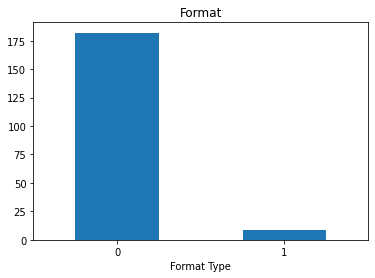

In [62]:
import matplotlib.pyplot as plt

df.Format.value_counts().plot(kind = "bar")
plt.title("Format")
plt.xticks(rotation=0)
plt.xlabel("Format Type")
plt.show()



In [63]:
df.Interval_of_publication.value_counts(normalize = True)

0    0.722513
3    0.167539
2    0.057592
1    0.052356
Name: Interval_of_publication, dtype: float64

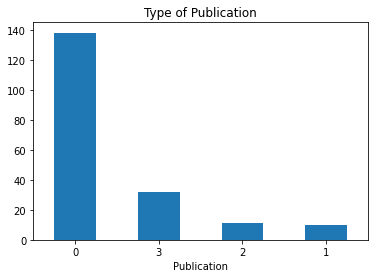

In [67]:

plt.title("Type of Publication")
yaxis1 = ["Daily","online", "weekly"]
df.Interval_of_publication.value_counts().plot(kind = "bar")
plt.xticks(rotation=0)
plt.xlabel("Publication")
plt.show()
